In [1]:
# import rdkit components
from rdkit import rdBase
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw

# use IPythonConsole for pretty drawings
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_useSVG=True

# for flattening
from itertools import chain

FAILED!


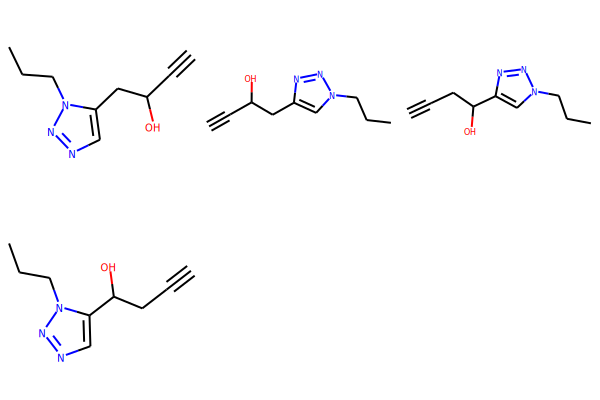

In [2]:
# define reactants
diyne_smiles = 'C#CCC(O)C#C'
azide_smiles = 'CCCN=[N+]=[N-]'

diyne = Chem.MolFromSmiles(diyne_smiles)
azide = Chem.MolFromSmiles(azide_smiles)

# define reaction
copper_click_smarts = '[C:1]#[C:2].[N:3]=[N+:4]=[N-:5]>>[c:1]1[c:2][n-0:3][n-0:4][n-0:5]1'
copper_click = AllChem.ReactionFromSmarts(copper_click_smarts)

# run reaction
products_tuples = copper_click.RunReactants((diyne, azide))

# flatten product tuple of tuples into list
products = list(chain(*products_tuples))

# FAILS: mol property caches are not updated
try:
    Draw.MolsToGridImage(products)
except RuntimeError:
    print 'FAILED!'

# this works: force updating 
for product in products:
    product.UpdatePropertyCache()

Draw.MolsToGridImage(products)

((<rdkit.Chem.rdchem.Mol object at 0x10dc22398>,), (<rdkit.Chem.rdchem.Mol object at 0x10dc22cf8>,), (<rdkit.Chem.rdchem.Mol object at 0x10dc4c578>,), (<rdkit.Chem.rdchem.Mol object at 0x10dc4c5f0>,))
4
(<rdkit.Chem.rdchem.Mol object at 0x10dc22398>,)
(<rdkit.Chem.rdchem.Mol object at 0x10dc22cf8>,)
(<rdkit.Chem.rdchem.Mol object at 0x10dc4c578>,)
(<rdkit.Chem.rdchem.Mol object at 0x10dc4c5f0>,)


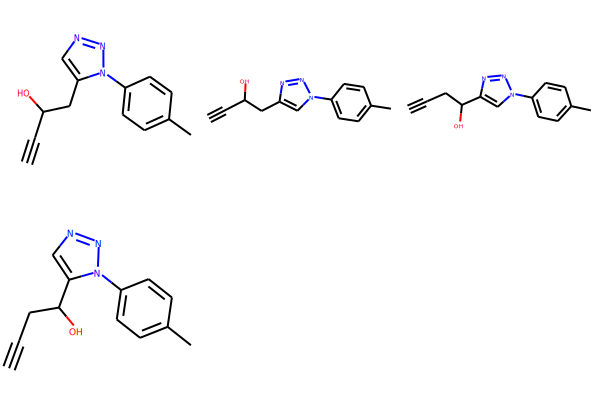

In [32]:
# display info on products
print products
print len(products)
for item in products:
    print item


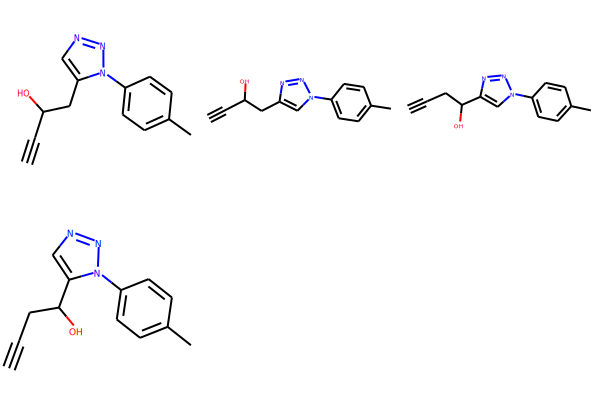

In [31]:
for mol in mols:
    mol.UpdatePropertyCache()
    
Draw.MolsToGridImage(mols)